<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/Radio_Galaxies_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.sciencedirect.com/science/article/pii/S2352340923000926

# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data

In [2]:
#https://zenodo.org/records/7351724
!wget -O RadioGalaxyDataset-v0.1.2.zip 'https://zenodo.org/records/7351724/files/floriangriese/RadioGalaxyDataset-v0.1.2.zip?download=1'

--2024-05-14 20:22:07--  https://zenodo.org/records/7351724/files/floriangriese/RadioGalaxyDataset-v0.1.2.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5071109 (4.8M) [application/octet-stream]
Saving to: ‘RadioGalaxyDataset-v0.1.2.zip’

RadioGalaxyDataset- 100%[===================>]   4.84M  2.64MB/s    in 1.8s    

2024-05-14 20:22:10 (2.64 MB/s) - ‘RadioGalaxyDataset-v0.1.2.zip’ saved [5071109/5071109]



In [3]:
import zipfile
import os

# Replace 'RadioGalaxyDataset-v0.1.2.zip' with the path to your zip file
zip_path = 'RadioGalaxyDataset-v0.1.2.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Check the extracted files
for dirname, _, filenames in os.walk('extracted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


extracted_data/floriangriese-RadioGalaxyDataset-7372637/README.md
extracted_data/floriangriese-RadioGalaxyDataset-7372637/requirements.txt
extracted_data/floriangriese-RadioGalaxyDataset-7372637/LICENSE
extracted_data/floriangriese-RadioGalaxyDataset-7372637/.gitignore
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/galaxy_data_removed.csv
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/FRICat_Capetti_2017_relabeled.csv
extracted_data/floriangriese-RadioGalaxyDataset-7372637/meta/galaxy_data_different_labels.csv
extracted_data/floriangriese-RadioGalaxyDataset-7372637/img/Classification_Scheme.png
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/galaxy_data_h5.zip
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/__init__.py
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/galaxy_data.zip
extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata/firstgalaxydata.py
extracted_data/f

In [4]:
#Donwload the requirment packeges
!pip install -r /content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/requirements.txt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [5]:
cd /content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata

/content/extracted_data/floriangriese-RadioGalaxyDataset-7372637/firstgalaxydata


In [6]:
from firstgalaxydata import FIRSTGalaxyData

In [7]:
from firstgalaxydata import FIRSTGalaxyData
import torchvision.transforms as transforms


if __name__ == "__main__":
    transformRGB = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

    # Basic usage of splitting train, valid and test

    data = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

    img, label = data.__getitem__(0)

    print(data)
    data = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)

    print(data)

    data = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
                           selected_classes=["FRI", "FRII", "Compact", "Bent"],
                           selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
                                                "Baldi2018", "Proctor_Tab1"],
                           is_PIL=True, is_RGB=True, transform=transformRGB)
    print(data)




Dataset FIRSTGalaxyData
    Selected classes: dict_values(['FRI', 'FRII', 'Compact', 'Bent'])
    Number of datapoints in total: 1758
    Number of datapoint in class FRI: 395
    Number of datapoint in class FRII: 824
    Number of datapoint in class Compact: 291
    Number of datapoint in class Bent: 248
    Split: train
    Root Location: ./
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None
Dataset FIRSTGalaxyData
    Selected classes: dict_values(['FRI', 'FRII', 'Compact', 'Bent'])
    Number of datapoints in total: 200
    Number of datapoint in class FRI: 50
    Number of datapoint in class FRII: 50
    Number of datapoint in class Compact: 50
    Number of datapoint in class Bent: 50
    Split: valid
    Root Location: ./
    Transforms (if any): Compose(
                             ToTensor()
                 

In [8]:
# FRI_all = FIRSTGalaxyData(root="./", selected_split="all", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRI"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)
# FRI_all

In [9]:
# FRI_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRI"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)
# FRII_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRII"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)

# Compact_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["Compact"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)

# Bent_train = FIRSTGalaxyData(root="./", selected_split="train", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["Bent"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)



In [10]:
# FRI_all = []
# FRII_all = []
# Compact_all = []
# Bent_all = []

# for i in range(len(data)):
#     img, label = data.__getitem__(i)
#     if label == 0:   FRI_all.append((    img, label))
#     elif label == 1: FRII_all.append((   img, label))
#     elif label == 2: Compact_all.append((img, label))
#     elif label == 3: Bent_all.append((    img, label))

In [11]:
# FRI_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRI"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)
# FRII_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRII"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)

# Compact_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["Compact"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)

# Bent_test = FIRSTGalaxyData(root="./", selected_split="test", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["Bent"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)



In [12]:
# FRI_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRI"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)
# FRII_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["FRII"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)

# Compact_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["Compact"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)

# Bent_valid = FIRSTGalaxyData(root="./", selected_split="valid", input_data_list=["galaxy_data_h5.h5"],
#                         selected_classes=["Bent"],
#                            selected_catalogues=["Gendre", "MiraBest", "Capetti2017a", "Capetti2017b",
#                                                 "Baldi2018", "Proctor_Tab1"],
#                            is_PIL=True, is_RGB=True, transform=transformRGB)



In [13]:
# #plot the first 10 images
# import matplotlib.pyplot as plt
# import numpy as np
# columns = 5
# rows = 10
# fig=plt.figure(figsize=(16, 8*rows//2))
# plt.suptitle("FIRST Galaxy Data", fontsize=16)

# for i in range(1, columns*rows +1):
#     img, label = data.__getitem__(i)
#     img = img / 2 + 0.5     # unnormalize
#     img = img.numpy()
#     img = np.transpose(img, (1, 2, 0))
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img,cmap='Greens')
#     plt.title(label)
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

In [14]:
# # plt.imshow(FRII_all[0][0])
# np.shape(FRII_all)

NameError: name 'FRII_all' is not defined

# Import `eta` librarie

In [ ]:
!pip install ordpy wurlitzer Pillow

In [ ]:
#!pip install git+https://github.com/rsautter/gpa/
!pip install git+https://github.com/barauna-lo/GPA.git

In [ ]:
# !pip install wurlitzer
!git clone https://github.com/rsautter/pyJHTDB
!pip install --log log.txt pyJHTDB/.

In [ ]:
!pip install --force-reinstal git+https://github.com/rsautter/eta/

In [ ]:
!pip install --force-reinstall git+https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import inset_locator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import cv2
import NCGL
import eta
import tqdm
import pyJHTDB
from pyJHTDB.dbinfo import mhd1024, isotropic1024coarse
from pyJHTDB import libJHTDB
from ordpy import *
from GPA import GPA
import glob
from PIL import Image



In [ ]:
data = FIRSTGalaxyData(root="./",input_data_list=["galaxy_data_h5.h5"])

FRI = []
FRII = []
Compact = []
Bent = []

for i in range(4):
  labels = np.ravel(data.labels)
  indices = np.where(labels == i)[0]
  numero_de_imagens = len(indices)
  print(f"Número de imagens para a classe {i}: {numero_de_imagens}")

  for j in range(numero_de_imagens):
        if   i == 0: FRI.append(data.data[np.where(labels==i)[0][j]])
        elif i == 1: FRII.append(data.data[np.where(labels==i)[0][j]])
        elif i == 2: Compact.append(data.data[np.where(labels==i)[0][j]])
        elif i == 3: Bent.append(data.data[np.where(labels==i)[0][j]])



In [210]:
def normalized(data):
  for i in range(len(data)):
    data[i] = data[i]/np.max(data[i])
  return data
FRI     = normalized(FRI)
FRII    = normalized(FRII)
Compact = normalized(Compact)
Bent    = normalized(Bent)

In [ ]:
plt.figure(figsize=(10,5))

all = [FRI,FRII,Compact,Bent]

for i in range(len(all)):
  plt.subplot(2,4,1+i)
  plt.title(data.class_dict[i])
  plt.imshow(all[i][0])
  plt.axis('off')

  plt.subplot(2,4,i+5)
  plt.imshow(all[i][1])
  plt.axis('off')
plt.tight_layout()

In [ ]:
def df_entropys(data):
  df_data = []
  for i in tqdm.tqdm(range(len(data))):
    s = data[i]
    d = eta.entropy(s)
    # gpaRes = ga(s,moment=['G4'])
    # d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
    df_data.append(d)
  return pd.DataFrame(df_data)


In [215]:
dfFRI = df_entropys(FRI)
dfFRII = df_entropys(FRII)
dfCompact = df_entropys(Compact)
dfBent = df_entropys(Bent)

100%|██████████| 248/248 [08:02<00:00,  1.95s/it]


In [216]:
dfFRI.to_csv('dfFRI.csv', index=False)
dfFRII.to_csv('dfFRII.csv', index=False)
dfCompact.to_csv('dfCompact.csv', index=False)
dfBent.to_csv('dfBent.csv', index=False)

In [218]:

def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr



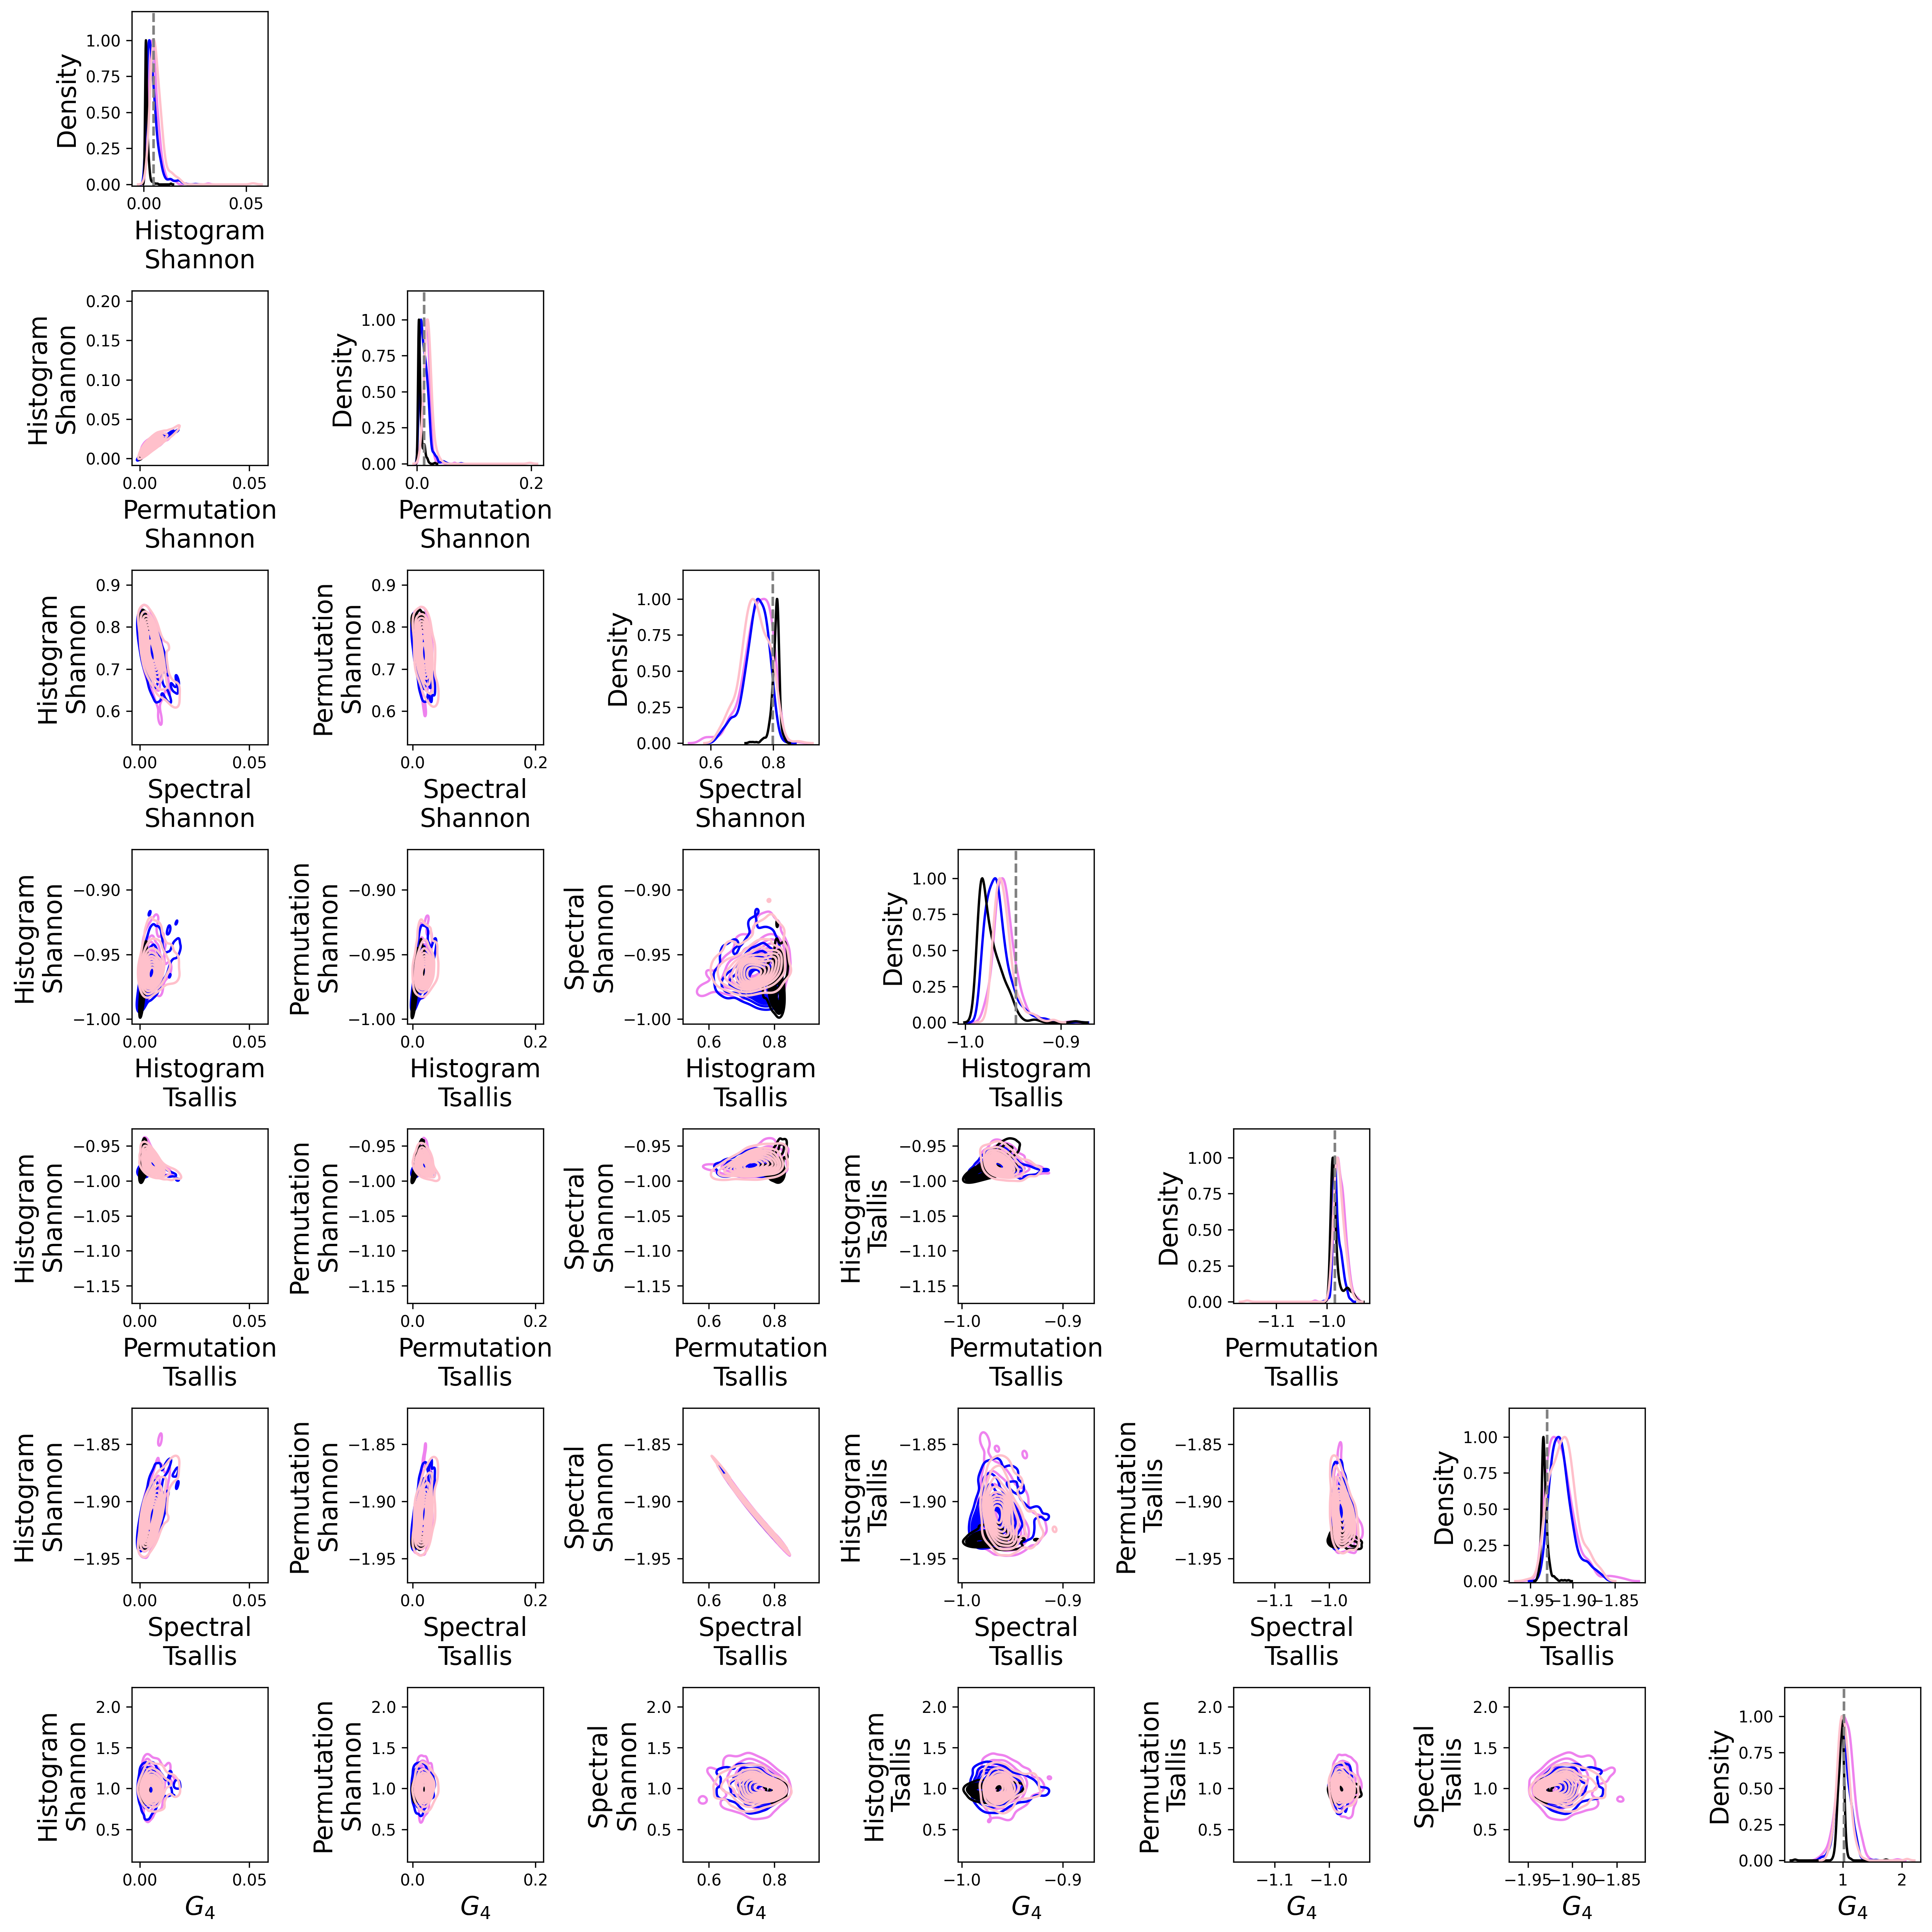

In [220]:
fontsize = 16
names = dfFRI.columns.values.copy()
# for i in range(len(names)): names[i]= names[i].replace('_', '\n').replace('Powerlaw','')
gs = GridSpec(len(names),len(names))

plt.figure(figsize=(17,17),dpi=300)
for j in range(len(names)):
  for i in range( j, len(names)):
      plt.subplot(gs[i,j])
      if i==j:
        ax = sns.kdeplot(dfFRI[names[i]],color='violet',common_norm=True)
        ax = sns.kdeplot(dfFRII[names[i]]  ,color='blue'  ,common_norm=True)
        ax = sns.kdeplot(dfCompact[names[i]] ,color='black' ,common_norm=True)
        ax = sns.kdeplot(dfBent[names[i]]  ,color='pink'  ,common_norm=True)
        for line in ax.lines:
          line.set_ydata(normalize(line.get_ydata(),0,1))
          plt.axvline(dfFRI[names[i]].iloc[0],color='gray',ls='--')
        if names[i] == '$G_4$':
          plt.xlabel(names[i],size=fontsize)

        else:
          plt.xlabel(names[i].replace('_', '\n').replace('Powerlaw',''),size=fontsize)
        plt.ylabel('Density',size=fontsize)
        plt.ylim(-0.01,1.2)
      else:
        sns.kdeplot(dfFRI[[names[i],names[j]]],x=names[j],y=names[i],color='violet',fill=False)
        sns.kdeplot(dfFRII[[names[i],names[j]]],x=names[j]  ,y=names[i],color='blue'  ,fill=False)
        sns.kdeplot(dfCompact[[names[i],names[j]]],x=names[j] ,y=names[i],color='black' ,fill=False)
        sns.kdeplot(dfBent[[names[i],names[j]]],x=names[j]  ,y=names[i],color='pink'  ,fill=False)

        if names[i] == '$G_4$':
          plt.xlabel(names[i],size=fontsize)
          # plt.ylabel(names[j],size=fontsize)
        else:
          plt.xlabel(names[i].replace('_', '\n').replace('Powerlaw',''),size=fontsize)
        plt.ylabel(names[j].replace('_', '\n').replace('Powerlaw',''),size=fontsize)

# plt.legend(handles=legend_elements,fontsize=14,loc='upper right',bbox_to_anchor=(0.5,1.9))
plt.tight_layout()
plt.savefig('cube_spaces.pdf')
plt.show()